In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

df = pd.read_excel('DataSet/university data.xlsx')

In [2]:
FORMAT = ['CS Score (USNews)', 'Research Overhead %', 'Admin Base Pay$', 'Tuition(out-state)$']
df = df[FORMAT]
print(df.columns)

Index(['CS Score (USNews)', 'Research Overhead %', 'Admin Base Pay$',
       'Tuition(out-state)$'],
      dtype='object')


In [3]:
print(df['CS Score (USNews)'].count(), df['CS Score (USNews)'].sum(), df['CS Score (USNews)'].mean())

49 157.5 3.2142857142857144


In [4]:
df.count()

CS Score (USNews)      49
Research Overhead %    49
Admin Base Pay$        49
Tuition(out-state)$    49
dtype: int64

In [5]:
mu = df.sum()/df.count()
for i in range(mu.size):
    print('mu{} {:.3f}'.format(i,mu[i]))

mu0 3.214
mu1 53.386
mu2 469178.816
mu3 29711.959


In [6]:
np.cov(df['Admin Base Pay$'],df['Research Overhead %'])

array([[ nan,  nan],
       [ nan,  nan]])

In [8]:
X = np.vstack((df['CS Score (USNews)'], df['Research Overhead %']))
X = np.delete(X,-1,1)

In [9]:
np.cov(X)

array([[  0.4575    ,   1.105625  ],
       [  1.105625  ,  12.85041667]])

In [10]:
Y = np.vstack((df['CS Score (USNews)'], df['Research Overhead %'], df['Admin Base Pay$'], df['Tuition(out-state)$']))
Y = np.delete(Y,-1,1)

In [11]:
df.cov()

,CS Score (USNews),Research Overhead %,Admin Base Pay$,Tuition(out-state)$
CS Score (USNews),0.457500,1.105625,3.879782e+03,1.058480e+03
Research Overhead %,1.105625,12.850417,7.027938e+04,2.805789e+03
Admin Base Pay$,3879.781845,70279.376488,1.418972e+10,-1.636856e+08
Tuition(out-state)$,1058.479762,2805.788988,-1.636856e+08,3.136770e+07


In [12]:
print('\nMeans')
mu = df.sum()/df.count()
for i in range(mu.size):
    print('mu{} {:.3f}'.format(i+1,mu[i]))
    
mu2 = np.mean(df)
for i in range(mu.size):
    print('mu{} {:.3f}'.format(i+1,mu[i]))

print('\nVariance')
var = df.var()
for i in range(var.size):
    print('var{} {:.3f}'.format(i+1,var[i]))

print('\nVariance using Unbiased Estimator')
var2 = np.var(df)
for i in range(var2.size):
    print('var{} {:.3f}'.format(i+1,var2[i]))

print('\nStandard Deviation')
std = df.std()
for i in range(std.size):
    print('sigma{} {:.3f}'.format(i+1,std[i]))

print('\nStandard Deviation using Unbiased Estimator')
std2 = np.std(df)
for i in range(std2.size):
    print('sigma{} {:.3f}'.format(i+1,std2[i]))

Y = np.vstack((df['CS Score (USNews)'], df['Research Overhead %'], df['Admin Base Pay$'], df['Tuition(out-state)$']))
Y = np.delete(Y,-1,1)
covarianceMat = np.cov(Y)
np.set_printoptions(formatter={'float': lambda x: "{:0.3f}".format(x)})
# np.set_printoptions(precision=3,suppress=True)
print('CovarianceMat:\n{}'.format(np.round(covarianceMat,decimals=3)))
correlationMat = np.corrcoef(Y)
print('correlationMat:\n{}'.format(correlationMat))


Means
mu1 3.214
mu2 53.386
mu3 469178.816
mu4 29711.959
mu1 3.214
mu2 53.386
mu3 469178.816
mu4 29711.959

Variance
var1 0.457
var2 12.850
var3 14189720820.903
var4 31367695.790

Variance using Unbiased Estimator
var1 0.448
var2 12.588
var3 13900134681.701
var4 30727538.733

Standard Deviation
sigma1 0.676
sigma2 3.585
sigma3 119120.615
sigma4 5600.687

Standard Deviation using Unbiased Estimator
sigma1 0.669
sigma2 3.548
sigma3 117898.832
sigma4 5543.243
CovarianceMat:
[[0.457 1.106 3879.782 1058.480]
 [1.106 12.850 70279.376 2805.789]
 [3879.782 70279.376 14189720820.903 -163685641.258]
 [1058.480 2805.789 -163685641.258 31367695.790]]
correlationMat:
[[1.000 0.456 0.048 0.279]
 [0.456 1.000 0.165 0.140]
 [0.048 0.165 1.000 -0.245]
 [0.279 0.140 -0.245 1.000]]


In [13]:
np.corrcoef(Y)

array([[1.000, 0.456, 0.048, 0.279],
       [0.456, 1.000, 0.165, 0.140],
       [0.048, 0.165, 1.000, -0.245],
       [0.279, 0.140, -0.245, 1.000]])

In [14]:
X1 = df['CS Score (USNews)']

In [18]:
loglike[0] = -(49/2)*np.log(2*np.pi*var2[0]) - (1/(2*var2[0]))*np.sum((Y[0,:]-mu[0])**2)
loglike[1] = -(49/2)*np.log(2*np.pi*var2[1]) - (1/(2*var2[1]))*np.sum((Y[1,:]-mu[1])**2)
loglike[2] = -(49/2)*np.log(2*np.pi*var2[2]) - (1/(2*var2[2]))*np.sum((Y[2,:]-mu[2])**2)
loglike[3] =  -(49/2)*np.log(2*np.pi*var2[3]) - (1/(2*var2[3]))*np.sum((Y[3,:]-mu[3])**2)

np.sum(loglike)

-1315.098792560739

In [19]:
loglike =  -(49/2)*np.log(2*np.pi*var2) - (0.5/var2)*np.sum((Y-mu2[:,np.newaxis])**2,axis=1)
np.sum(loglike)

-1315.098792560739

In [22]:
loglike[0] = -np.sum((Y[0,:]-mu[0])**2)
loglike[1] = -np.sum((Y[1,:]-mu[1])**2)
loglike[2] = -np.sum((Y[2,:]-mu[2])**2)
loglike[3] = - (1/(2*var[3]))*np.sum((Y[3,:]-mu[3])**2)

In [23]:
loglike = - np.sum((Y-mu2[:,np.newaxis])**2,axis=1)
loglike

array([-21.960, -616.820, -681106599403.347, -1505649397.918])

In [26]:
var = multivariate_normal.logpdf(Y.T, mu, cov = covarianceMat,allow_singular = True)
var = sum(var)
var

-1262.3272000613699

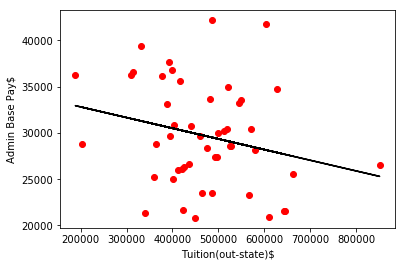

In [82]:
plt.plot(Y[2,:], Y[3,:], 'ro')
plt.ylabel(FORMAT[2])
plt.xlabel(FORMAT[3])
fit = np.polyfit(Y[2,:], Y[3,:],1)
fit_fn = np.poly1d(fit)
plt.plot( Y[2,:], fit_fn(Y[2,:]), '-k')
plt.show()

In [38]:
Y[0,:]

array([5.000, 4.600, 4.500, 4.300, 4.300, 4.200, 4.100, 4.100, 4.000,
       4.000, 3.700, 3.600, 3.600, 3.400, 3.400, 3.400, 3.400, 3.300,
       3.300, 3.300, 3.300, 3.100, 3.100, 3.100, 3.100, 3.100, 3.100,
       3.000, 3.000, 3.000, 2.900, 2.900, 2.800, 2.800, 2.800, 2.700,
       2.600, 2.600, 2.600, 2.600, 2.500, 2.500, 2.400, 2.400, 2.400,
       2.400, 2.400, 2.400, 2.400])

In [42]:
Y[1,:]

array([57.000, 58.600, 54.500, 55.900, 55.000, 53.000, 54.000, 55.000,
       55.000, 52.000, 55.000, 59.000, 52.000, 54.500, 54.500, 52.000,
       58.000, 54.000, 55.000, 57.000, 53.500, 58.000, 48.500, 53.000,
       53.500, 49.000, 61.000, 54.500, 51.500, 50.000, 56.000, 54.000,
       53.500, 54.000, 53.500, 59.800, 50.000, 59.500, 51.000, 45.000,
       49.900, 46.000, 47.000, 48.700, 50.500, 51.000, 49.000, 53.000,
       51.000])

In [44]:
Y[1,:]*correlationMat[0,1]

array([25.991, 26.721, 24.851, 25.490, 25.079, 24.167, 24.623, 25.079,
       25.079, 23.711, 25.079, 26.903, 23.711, 24.851, 24.851, 23.711,
       26.447, 24.623, 25.079, 25.991, 24.395, 26.447, 22.115, 24.167,
       24.395, 22.343, 27.815, 24.851, 23.483, 22.799, 25.535, 24.623,
       24.395, 24.623, 24.395, 27.268, 22.799, 27.131, 23.255, 20.519,
       22.754, 20.975, 21.431, 22.207, 23.027, 23.255, 22.343, 24.167,
       23.255])

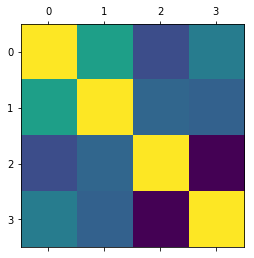

In [52]:
plt.matshow(correlationMat)
plt.show()

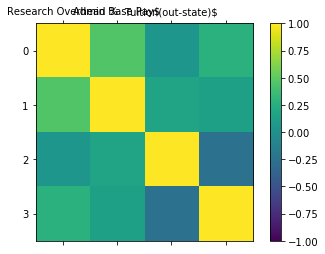

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlationMat, vmin=-1, vmax=1)
fig.colorbar(cax)
# ticks = np.arange(0,4,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(FORMAT)
# ax.set_yticklabels(FORMAT)
plt.show()